## Compare Firebase Comm Logs with MongoDB Data

### Pull MongoDB data


In [1]:
import os
import datetime as dt
import pandas as pd
import csv

In [2]:
# add the 'src' directory as one where we can import modules
import sys
import pathlib # __file__ isn't recognized in Jupyter, so we need this to get the root path
path = pathlib.Path.cwd()
PROJ_ROOT = path.parent 
src_dir = str(PROJ_ROOT / 'src')
PROJ_ROOT = str(PROJ_ROOT)
sys.path.append(src_dir)
# from data import make_dataset

In [4]:
from data import user_df_setup

interim_data_file_path = os.path.join(PROJ_ROOT,
                                 "data",
                                 "interim",
                                 "full_users_df.pkl")
# users_df = pd.read_pickle(interim_data_file_path)
raw_data_file_path = os.path.join(PROJ_ROOT,
                             "data",
                             "raw",
                             "users_df.pkl")
raw_users_df = pd.read_pickle(raw_data_file_path)

all_users_df = user_df_setup.user_df_setup(raw_data_file_path, interim_data_file_path)

users_df = all_users_df
# raw_users_df
# raw_users_df[['username', 'timeCreated']].sort_values('timeCreated', ascending = False).head(20)
all_users_df.sort_values('date_created', ascending = False).head(20)
# all_users_df.index
# all_users_df.head(20)

Interim users_df not found, generating new


,date_created,refresh_time,userId,unrated_threshold,risky_threshold,supportive_threshold
username,,,,,,
rosan,2019-01-16,NaN,5c3f1e93f6e9e5001029125d,0.0,1.0,3.0
google1,2019-01-10,NaN,5c37da37bf72c30010afa656,0.0,1.0,3.0
hbickers,2019-01-10,NaN,5c3772f8fcc77a001013ffd9,0.0,1.0,3.0
yuseff7,2019-01-07,NaN,5c339ab2a6b02e00107cecd2,0.0,1.0,3.0
kaltmann19,2019-01-05,NaN,5c30991169f83d0010630d58,0.0,1.0,3.0
test12345678@c.us,2019-01-04,NaN,5c2eee5469f83d0010630d4a,0.0,1.0,3.0
mattiet,2019-01-03,NaN,5c2e4c0fa6b02e00107cec98,0.0,1.0,3.0
bebeqq,2018-12-26,NaN,5c22e35a60e2c8001079aa23,0.0,1.0,3.0
bebeq,2018-12-26,NaN,5c22e24960e2c8001079aa20,0.0,1.0,3.0


In [10]:
current_users = all_users_df[all_users_df['date_created'] > (dt.date.today() - dt.timedelta(30))]
user_ids = all_users_df['userId'].tolist()
print(len(user_ids))
# user_ids

108


### Force-pulling Contacts data from MongoDB

In [6]:
from data import database_query

raw_data_path = os.path.join(PROJ_ROOT,
                             "data",
                             "raw")
current_users_df = all_users_df[all_users_df['date_created'] > (dt.date.today() - dt.timedelta(30))]
user_ids = current_users_df['userId'].tolist()
database_query.make_raw_contacts_df(database_query.mongo_connect(),
                                   raw_data_path,
                                   user_ids)

### Force-creating Contacts interim data

In [7]:
from data import contacts_df_setup

interim_data_path = os.path.join(PROJ_ROOT,
                                 "data",
                                 "interim")
contacts_dict = {}

usernames = current_users.index
for username in usernames: 
    interim_contact_data_file_path = os.path.join(interim_data_path, 'contacts_df_' + username + '.pkl')
    if os.path.isfile(interim_contact_data_file_path):
        contacts_df = pd.read_pickle(interim_contact_data_file_path)
    else:
        contacts_df = contacts_df_setup.contacts_df_setup(username,
                                                          current_users_df,
                                                          raw_data_path,
                                                          interim_data_path)
    contacts_dict[username] = contacts_df

c:\users\vinny\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\vinny\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


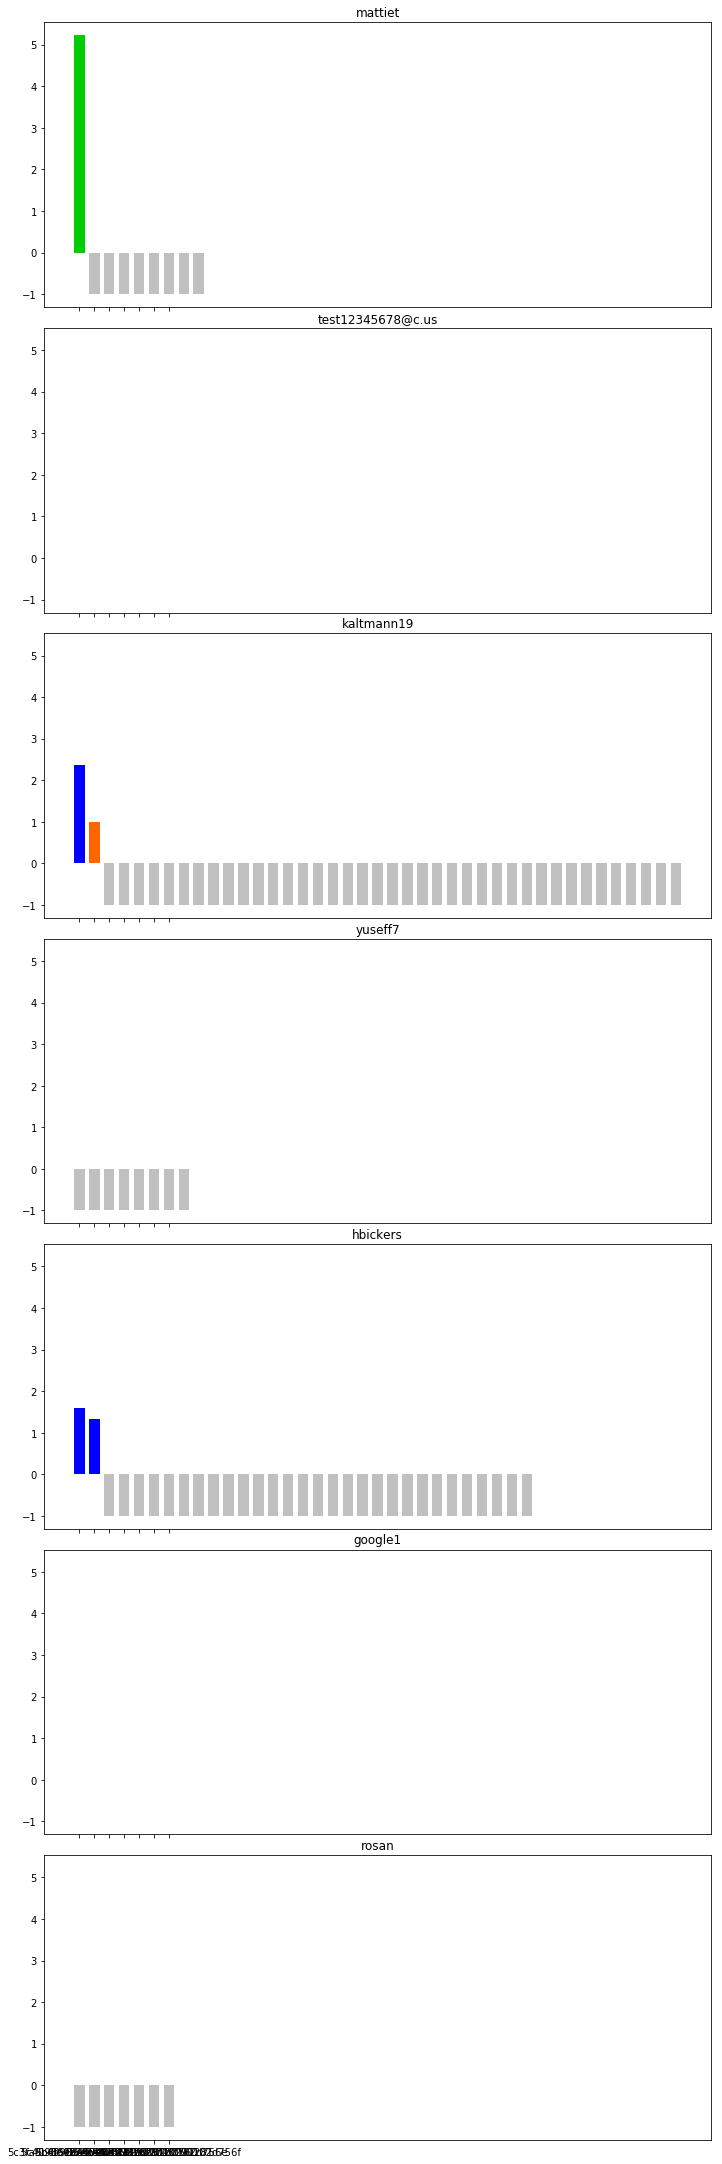

In [11]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(len(usernames),figsize=(10,30), sharex = True, sharey = True)
plt.tight_layout()

for count, e in enumerate(usernames):  
    unrated_threshold = users_df.loc[e, 'unrated_threshold']
    risky_threshold = users_df.loc[e, 'risky_threshold']
    supportive_threshold = users_df.loc[e, 'supportive_threshold']
    
    contacts_df = contacts_dict[e].sort_values('score', ascending = False)
    unrated = contacts_df['score'][contacts_df['score'] < unrated_threshold]
    risky = contacts_df['score'][(contacts_df['score'] >= unrated_threshold)
                                                     & (contacts_df['score'] <= risky_threshold)]
    neutral = contacts_df['score'][(contacts_df['score'] > risky_threshold)
                                                     & (contacts_df['score'] < supportive_threshold)]
    supportive = contacts_df['score'][(contacts_df['score'] >= supportive_threshold)]
    
    axarr[count].bar(supportive.index, supportive, 0.7, color = '#00cc00')
    axarr[count].bar(neutral.index, neutral, 0.7, color = 'b')
    axarr[count].bar(risky.index, risky, 0.7, color = '#ff6600')
    axarr[count].bar(unrated.index, unrated, 0.7, color = '#C0C0C0')
    axarr[count].set_title(e)
    
    # unrelated, pulling the counts
    current_users.loc[e, 'unrated_contacts'] = len(unrated)
    current_users.loc[e, 'risky_contacts'] = len(risky)
    current_users.loc[e, 'neutral_contacts'] = len(neutral)
    current_users.loc[e, 'supportive_contacts'] = len(supportive)
    current_users.loc[e, 'rated_contacts'] = len(contacts_df) - current_users.loc[e, 'unrated_contacts']
plt.show()

In [ ]:
# current_users[['date_created', 'unrated_contacts', 'risky_contacts', 'neutral_contacts', 'supportive_contacts', 'rated_contacts']]
# current_users

In [ ]:
import numpy as np

for username in usernames: 
    if username in notification_dict.keys():
        notifications_df = notification_dict[username]
        current_users.loc[username, 'notifications'] = len(notifications_df.index)
    else:
        current_users.loc[username, 'notifications'] = 0